<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/39_%EC%88%98%EC%A7%91%ED%95%9C_%EB%89%B4%EC%8A%A4_%EA%B8%B0%EC%82%AC%EB%A1%9C_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D%ED%95%98%EA%B3%A0_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 39장 수집한 뉴스 기사로 빈도분석하고 워드클라우드 그리기

- 빈도분석
    - 문장이나 대화 속에서 각각의 문자의 빈출 경향의 정도를 분석
    - 빈도 분석 알고리즘
    ```
    words = ['한국', '한국', '일본', '중국']
    dic = {}
    for i in words:
        if i in dic:
            dic[i] += 1
        else:
            dic[i] = 1
    dic

    {'한국':2, '일본':1, '중국':1}
    ```
    ```
    from wordcloud import WordCloud

    wc = WordCloud(font_path="...", background_color='...', mask = '...')
    wc.generate_from_frequencies(dic)
    ```

In [1]:
# 한글폰트, 모양에 따라 워드클라우드 넣기

import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image # 이미지 데이터 불러오고 처리하는 라이브러리

In [2]:
from tqdm import tqdm

total = []

# for n in range(1,3992, 10):  # 400개 페이지 가져오기

for n in tqdm(range(1, 92, 10)):

    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=98&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)

    news = html.find("ul", class_='list_news').find_all('li', class_='bx')

    for i in news:
        title = i.find('a', class_='news_tit').text
        content = i.find('a', class_='api_txt_lines dsc_txt_wrap').text
                
        total.append([title, content])
    
    time.sleep(1)

100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


In [3]:
len(total)

100

In [4]:
df = pd.DataFrame(total, columns = ['제목', '요약'])
df

,제목,요약
0,"옐런 美재무 ""한국측 전기차 우려 고려하겠지만 법대로 시행""","""뭐가 가능한지 검토하겠다""…외신 ""수정 기대에 찬물 끼얹는 발언"" 평가 한국산 전..."
1,"IMF ""한국 경제 기초여건 좋은 상태이나 정부 부채 관리해야""","국제통화기금(IMF)은 25일 한국의 경제 펀더멘털(기초여건)이 좋은 상태지만, 최..."
2,"한국노총 ""김문수, 계속 분란시 경사노위 탈퇴할 수도""(종합)",김동명 한국노동조합총연맹(한국노총) 위원장은 25일 김문수 경제사회노동위원회(경사노...
3,"일본 해상자위대 ""한국, 내달 관함식 참가 여부 회신 없어""",일본 해상자위대 사카이 료 해상막료장은 한국이 다음 달 6일 가나가와현 '사가미'만...
4,쪼개진 한국정치… 野 보이콧에 사상 첫 ‘반쪽' 시정연설,한국 정치의 안타까운 단면이 고스란히 드러난 상징적 장면이었다. 여야의 극한 대립으...
...,...,...
95,"한국 DRX, 롤드컵서 '디펜딩 챔피언' EDG 꺾고 4강 파란",8강전에서 한국 리그 중위권 팀 DRX가 작년 롤드컵 우승팀인 중국의 에드워드 게이...
96,"옐런 “전기차 보조금, 한국 우려 알지만…법대로 시행”",블룸버그 통신은 “보조금 대상에서 제외된 한국 자동차업계에 찬물을 끼얹는 발언”이라...
97,"한국필립모리스, '아이코스 일루마' 공식 출시",한국필립모리스가 25일 서울 롯데호텔 그랜드볼룸에서 차세대 궐련형 전자담배 기기인 ...
98,"""제2의 블랙핑크 꿈꿔요""‥태국 아이돌의 한국 유학기",그런데 이 걸그룹은 한국으로 K팝 유학를 온 태국의 유명 아이돌들입니다. 한국 정부...


In [5]:
import re

text = ''

for i in total :
    text += i[0]
    text += '\n'
    text += i[1]
    text += '\n'

len(text)

15582

In [8]:
box = re.findall("[가-힣]{2,}", text)
len(box)

3034

In [10]:
dic = {}

for i in box:
    if i in dic:
        dic[i] += 1
    else:
        dic[i] = 1
    
dic

{'옐런': 4,
 '재무': 2,
 '한국측': 1,
 '전기차': 5,
 '우려': 3,
 '고려하겠지만': 1,
 '법대로': 2,
 '시행': 3,
 '뭐가': 1,
 '가능한지': 1,
 '검토하겠다': 1,
 '외신': 1,
 '수정': 1,
 '기대에': 1,
 '찬물': 1,
 '끼얹는': 2,
 '발언': 5,
 '평가': 1,
 '한국산': 1,
 '전기차를': 1,
 '보조금': 3,
 '혜택에서': 1,
 '블룸버그통신에': 1,
 '따르면': 11,
 '장관은': 2,
 '이날': 6,
 '기자들과': 2,
 '만나': 3,
 '보조금과': 1,
 '관련한': 2,
 '한국과': 6,
 '유럽': 5,
 '측의': 2,
 '한국': 97,
 '경제': 7,
 '기초여건': 2,
 '좋은': 3,
 '상태이나': 1,
 '정부': 7,
 '부채': 1,
 '관리해야': 1,
 '국제통화기금': 2,
 '한국의': 22,
 '펀더멘털': 2,
 '상태지만': 1,
 '최근': 6,
 '급증한': 1,
 '부채를': 1,
 '고려해': 1,
 '재정정책을': 1,
 '펴야': 1,
 '한다고': 1,
 '했다': 2,
 '한국은행을': 1,
 '방문한': 2,
 '크리슈나': 3,
 '스리니바산': 4,
 '아시아': 6,
 '한국노총': 8,
 '김문수': 7,
 '계속': 1,
 '분란시': 1,
 '경사노위': 4,
 '탈퇴할': 2,
 '수도': 1,
 '종합': 3,
 '김동명': 5,
 '한국노동조합총연맹': 3,
 '위원장은': 3,
 '경제사회노동위원회': 3,
 '위원장의': 1,
 '잇단': 1,
 '색깔론': 1,
 '발언에': 1,
 '대해': 3,
 '또다시': 1,
 '분란을': 1,
 '일으킨다면': 1,
 '위원장을': 1,
 '임명한': 1,
 '윤석열': 4,
 '대통령에게': 1,
 '책임을': 1,
 '물을': 1,
 '일본': 9,
 '해상자위대': 2,
 '내달': 3,
 '관함식': 2,
 '참가': 

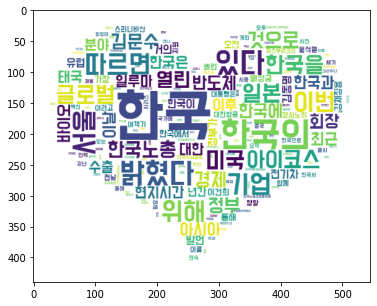

In [18]:
wc = WordCloud(font_path = "BMDOHYEON_ttf.ttf",
               background_color='white', mask=img)

plt.figure(figsize = (10,5))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

In [17]:
img = Image.open("하트.png") # 흰색에 가까울수록 255, 0에 가까울수록 검은색
img = np.array(img)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]